In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import os
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sampling import sampling_embedding
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# load raw
raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment10.csv"
load_raw_data = pd.read_csv(raw_data_path)
# combine detail
detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes'
path_name_after_no='_all_geneepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0/detail_e200.csv'
load_cellDancer=pd.DataFrame()
for i in range(1,11):
    detail_path=os.path.join(detail_result_path,(str(i)+path_name_after_no))
    detail=pd.read_csv(detail_path)
    load_cellDancer=load_cellDancer.append(detail)
load_cellDancer_bkup=load_cellDancer.copy()

In [3]:
# embedding, sampling_ixs, velocity_embedding=get_embedding(load_raw_data,load_cellDancer,gene_list=gene_list,n_neighbors=n_neighbors,step=step,mode=mode)

# load
# # mode: [mode='embedding', mode='gene']
# step_i,step_j=step[0],step[1]
gene_choice=list(load_raw_data.gene_list.drop_duplicates())
data_df = load_raw_data[['gene_list', 'u0', 's0', 'cellID',
                            'embedding1', 'embedding2']][load_raw_data.gene_list.isin(gene_choice)]



#############
# embedding_downsampling, sampling_ixs, knn_embedding = downsampling_embedding(data_df,
#                                                                                 para='neighbors',
#                                                                                 target_amount=0,
#                                                                                 step_i=step_i,
#                                                                                 step_j=step_j,
#                                                                                 n_neighbors=n_neighbors,
#                                                                             mode='pca')
#############
para='neighbors'
target_amount=0
step_i=100
step_j=100
mode='pca'
n_neighbors=10
'''
Guangyu
sampling cells by embedding
return: sampled embedding, the indexs of sampled cells, and the neighbors of sampled cells
'''

gene = data_df['gene_list'].drop_duplicates().iloc[0]
embedding = data_df.loc[data_df['gene_list']==gene][['embedding1','embedding2']]
print(para)
idx_downSampling_embedding = sampling_embedding(embedding,
            para=para,
            target_amount=target_amount,
            step_i=step_i,
            step_j=step_j
            )

if mode=='gene':
    print('using gene mode')
    cellID = data_df.loc[data_df['gene_list']==gene]['cellID']
    data_df_pivot=data_df.pivot(index='cellID', columns='gene_list', values='s0').reindex(cellID)
    embedding_downsampling = data_df_pivot.iloc[idx_downSampling_embedding]
elif mode=='pca':
    print('using pca mode')
    cellID = data_df.loc[data_df['gene_list']==gene]['cellID']
    data_df_pivot=data_df.pivot(index='cellID', columns='gene_list', values='s0').reindex(cellID)
    embedding_downsampling_0 = data_df_pivot.iloc[idx_downSampling_embedding]
    pca=PCA(n_components=20)
    pca.fit(embedding_downsampling_0)
    embedding_downsampling = pca.transform(embedding_downsampling_0)
elif mode=='pca_norm':
    from sklearn.decomposition import PCA
    print('using pca_norm')
    cellID = data_df.loc[data_df['gene_list']==gene]['cellID']
    data_df_pivot=data_df.pivot(index='cellID', columns='gene_list', values='s0').reindex(cellID)
    embedding_downsampling_0 = data_df_pivot.iloc[idx_downSampling_embedding]
    pca=PCA(n_components=3)
    pca.fit(embedding_downsampling_0)
    embedding_downsampling = pca.transform(embedding_downsampling_0)[:,range(3)]
    # def pca_norm(df):
    # df.groupby()
    # embedding_downsampling=pca_norm(embedding_downsampling_trans)
elif mode=='embedding':
    print('using cell mode')
    embedding_downsampling = embedding.iloc[idx_downSampling_embedding][['embedding1','embedding2']]
nn = NearestNeighbors(n_neighbors=n_neighbors)
nn.fit(embedding_downsampling)  # NOTE should support knn in high dimensions
embedding_knn = nn.kneighbors_graph(mode="connectivity")
# neighbor_ixs = embedding_knn.indices.reshape((-1, n_neighbors + 1))

# return(embedding_downsampling, idx_downSampling_embedding, embedding_knn)

neighbors
using pca mode


In [22]:
import numpy as np
embedding_downsampling
df=embedding_downsampling.copy()
maxInColumns = np.amax(embedding_downsampling, axis=0)
minInColumns = np.amin(embedding_downsampling, axis=0)
df_normed = (df - df.min(0)) / df.ptp(0)
df_normed

array([[3.43343410e-03, 3.82059793e-01, 4.02491408e-01],
       [1.68631164e-02, 3.57523955e-01, 5.57631798e-01],
       [4.14444465e-04, 3.91808942e-01, 2.19119835e-01],
       ...,
       [6.61133379e-01, 2.15617295e-01, 4.61305548e-01],
       [6.15473021e-01, 9.64038429e-02, 2.63547319e-01],
       [7.61875318e-01, 4.55411979e-01, 4.98634354e-01]])

/Users/guangyuwang/opt/anaconda3/envs/celldancer/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  del sys.path[0]


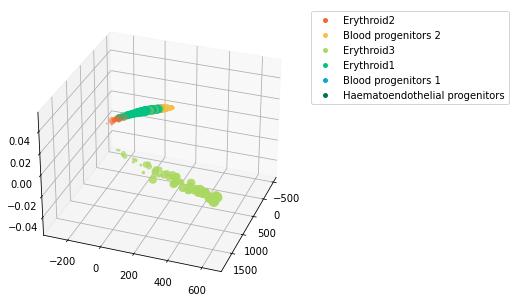

In [16]:
# 3d plot #
from colormap import *

colors = {'Erythroid2':grove2[6],
'Blood progenitors 2':grove2[5],
'Erythroid3':grove2[4],
'Erythroid1':grove2[3],
'Blood progenitors 1':grove2[2],
'Haematoendothelial progenitors':grove2[1],
'Blood progenitors 1':grove2[0]}

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(embedding_downsampling[:, 0], embedding_downsampling[:, 1], embedding_downsampling[:, 2],marker='o', c=load_raw_data[load_raw_data.gene_list ==
                                    load_raw_data.gene_list[0]]['clusters'][idx_downSampling_embedding].map(colors),)

# legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
def gen_Line2D(label, markerfacecolor):
    return Line2D([0], [0], color='w', marker='o', label=label, markerfacecolor=markerfacecolor,  markeredgewidth=0, markersize=5)
legend_elements = []
for i in colors:
    legend_elements.append(gen_Line2D(i, colors[i]))
plt.legend(handles=legend_elements, bbox_to_anchor=(1.01, 1), loc='upper left')

In [7]:
embedding_downsampling[:,range(4)].shape

(957, 4)

In [11]:
len(idx_downSampling_embedding)

937

In [15]:
 colors

{'Erythroid2': '#ef6a32',
 'Blood progenitors 2': '#fbbf45',
 'Erythroid3': '#aad962',
 'Erythroid1': '#03c383',
 'Blood progenitors 1': '#08A8CE',
 'Haematoendothelial progenitors': '#017351'}

In [19]:
embedding_downsampling.shape

(941, 5)

In [29]:
pca.explained_variance_ratio_.shape
sum(pca.explained_variance_ratio_[0:4])
cdf = np.cumsum(pca.explained_variance_ratio_)

<BarContainer object of 20 artists>

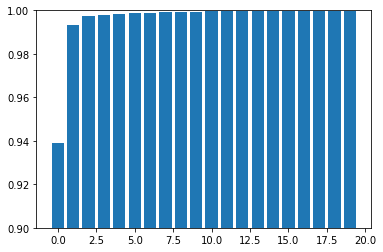

In [31]:
plt.ylim(0.9,1)
plt.bar(range(20),cdf)

/Users/guangyuwang/opt/anaconda3/envs/celldancer/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wanglab/.local/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


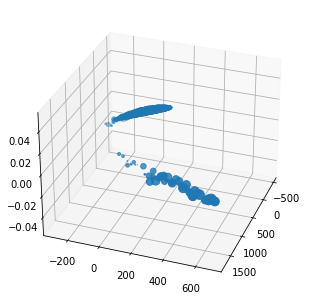

In [66]:
sum(pca.explained_variance_ratio_[0:2])

0.9934129790169148

In [64]:
pca.explained_variance_.shape
# pca.components_.shape

(951,)

In [6]:
# functions
def corr_coeff(ematrix, vmatrix, i):
    '''
    Calculate the correlation between the predict velocity (velocity_matrix[:,i])
    and the difference between a cell and every other (cell_matrix - cell_matrix[:, i])
    '''
    # ematrix = cell_matrix
    # vmatrix = velocity_matrix
    ematrix = ematrix.T
    vmatrix = vmatrix.T
    ematrix = ematrix - ematrix[i, :]
    vmatrix = vmatrix[i, :][None, :]
    ematrix_m = ematrix - ematrix.mean(1)[:, None]
    vmatrix_m = vmatrix - vmatrix.mean(1)[:, None]

    # Sum of squares across rows
    ematrix_ss = (ematrix_m**2).sum(1)
    vmatrix_ss = (vmatrix_m**2).sum(1)
    cor = np.dot(ematrix_m, vmatrix_m.T) / \
        np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))
    return cor.T


def velocity_correlation(cell_matrix, velocity_matrix):
    """Calculate the correlation between the predict velocity (velocity_matrix[:,i])
    and the difference between a cell and every other (cell_matrix - cell_matrix[:, i])

    Arguments
    ---------
    cell_matrix: np.ndarray (ngenes, ncells)
        gene expression matrix
    velocity_matrix: np.ndarray (ngenes, ncells)
    Return
    ---------
    c_matrix: np.ndarray (ncells, ncells)
    """
    c_matrix = np.zeros((cell_matrix.shape[1], velocity_matrix.shape[1]))
    for i in range(cell_matrix.shape[1]):
        c_matrix[i, :] = corr_coeff(cell_matrix, velocity_matrix, i)[0, :]
    np.fill_diagonal(c_matrix, 0)
    return c_matrix


def velocity_projection(cell_matrix, velocity_matrix, embedding, knn_embedding):
    '''
    cell_matrix: np.ndarray (ngenes, ncells)
        gene expression matrix
    velocity_matrix: np.ndarray (ngenes, ncells)
    '''
    # cell_matrix = np_s0[:,sampling_ixs]
    # velocity_matrix = np_dMatrix[:,sampling_ixs]
    sigma_corr = 0.05
    cell_matrix[np.isnan(cell_matrix)] = 0
    velocity_matrix[np.isnan(velocity_matrix)] = 0
    corrcoef = velocity_correlation(cell_matrix, velocity_matrix)
    probability_matrix = np.exp(corrcoef / sigma_corr)*knn_embedding.A
    probability_matrix /= probability_matrix.sum(1)[:, None]
    unitary_vectors = embedding.T[:, None, :] - embedding.T[:, :, None]
    with np.errstate(divide='ignore', invalid='ignore'):
        unitary_vectors /= np.linalg.norm(unitary_vectors, ord=2, axis=0)
        np.fill_diagonal(unitary_vectors[0, ...], 0)
        np.fill_diagonal(unitary_vectors[1, ...], 0)
    velocity_embedding = (probability_matrix * unitary_vectors).sum(2)
    velocity_embedding -= (knn_embedding.A * unitary_vectors).sum(2) / \
        knn_embedding.sum(1).A.T  # embedding_knn.A *
    velocity_embedding = velocity_embedding.T
    return velocity_embedding


def data_reshape(load_cellDancer):
    '''
    load detail file
    return expression matrix and velocity (ngenes, ncells)
    '''
    psc = 1
    gene_names = load_cellDancer['gene_name'].drop_duplicates().to_list()
    # cell_number = load_cellDancer[load_cellDancer['gene_name']==gene_names[0]].shape[0]
    # load_cellDancer['index'] = np.tile(range(cell_number),len(gene_names))
    # load_cellDancer['index'] = 0
    load_cellDancer.loc[:,'index']=0
    for g in gene_names:
        load_cellDancer.loc[load_cellDancer['gene_name'] == g, 'index'] = range(
            load_cellDancer[load_cellDancer['gene_name'] == g].shape[0])
    s0_reshape = load_cellDancer.pivot(
        index='gene_name', values='s0', columns='index')
    s1_reshape = load_cellDancer.pivot(
        index='gene_name', values='s1', columns='index')
    dMatrix = s1_reshape-s0_reshape
    np_s0_reshape = np.array(s0_reshape)
    np_dMatrix = np.array(dMatrix)
    np_dMatrix2 = np.sqrt(np.abs(np_dMatrix) + psc) * \
        np.sign(np_dMatrix)  # (2159, 18140)
    return(np_s0_reshape, np_dMatrix2)


